In [1]:
# Must open this file in QA_deliv directory in terminal
# Read results of last download in QA_deliv folder, rename with date in it, then move to archive
import os
import json
import datetime
import pandas
from pandas.io.json import json_normalize

# Read existing file in main directory
with open('annotation_stats.json') as json_data:
    old = json.load(json_data)

# Get date of existing file in main directory
date_old=old['timestamp']
old_date=datetime.datetime.fromtimestamp(date_old).strftime('%m-%d-%Y')

# Create rename string for moving file
rename= '/Users/jeremyflattau/Desktop/QA_deliver/archive/'+str(old_date)+'_annotation_stats.json'

# Move and rename file
os.rename('/Users/jeremyflattau/Desktop/QA_deliver/annotation_stats.json', rename)

In [2]:
# Conncect to remote machine and download newest json file
os.system("scp -i ~/.ssh/jongpu.pem -r ubuntu@34.195.31.203:/persistant_data/annotation_stats.json /Users/jeremyflattau/Desktop/QA_deliver/")

0

In [3]:
# Read new file from QA_deliver folder
os.chdir('/Users/jeremyflattau/Desktop/QA_deliver')

with open('annotation_stats.json') as json_data:
    new = json.load(json_data)
    
# Get date of new file 
date_new=new['timestamp']
new_date=datetime.datetime.fromtimestamp(date_new).strftime('%m-%d-%Y')

In [4]:
#####Extraction of Stats######

#Object Detection - clip and objects count defining for latest and previous files

# latest clip count by object
cat_clip=new['video_counts']['cat']
dog_clip=new['video_counts']['dog']
cow_clip=new['video_counts']['cow']
horse_clip=new['video_counts']['horse']
sheep_clip=new['video_counts']['sheep']
bird_clip=new['video_counts']['bird']
insect_clip=new['video_counts']['insect']
other_animal_clip=new['video_counts']['other_animal']
bicycle_clip=new['video_counts']['bicycle']
motorbike_clip=new['video_counts']['motorbike']
bus_clip=new['video_counts']['bus']
person_clip=new['video_counts']['person']
train_clip=new['video_counts']['train']
truck_clip=new['video_counts']['truck']
car_clip=new['video_counts']['car']
airplane_clip=new['video_counts']['airplane']
boat_clip=new['video_counts']['boat']
package_clip=new['video_counts']['package']
face_clip=new['video_counts']['face']

# latest track count by object
cat_obj=new['individual_counts']['cat']
dog_obj=new['individual_counts']['dog']
cow_obj=new['individual_counts']['cow']
horse_obj=new['individual_counts']['horse']
sheep_obj=new['individual_counts']['sheep']
bird_obj=new['individual_counts']['bird']
insect_obj=new['individual_counts']['insect']
other_animal_obj=new['individual_counts']['other_animal']
bicycle_obj=new['individual_counts']['bicycle']
motorbike_obj=new['individual_counts']['motorbike']
bus_obj=new['individual_counts']['bus']
person_obj=new['individual_counts']['person']
train_obj=new['individual_counts']['train']
truck_obj=new['individual_counts']['truck']
car_obj=new['individual_counts']['car']
airplane_obj=new['individual_counts']['airplane']
boat_obj=new['individual_counts']['boat']
package_obj=new['individual_counts']['package']
face_obj=new['individual_counts']['face']


# previous clip count by object
prev_cat_clip=old['video_counts']['cat']
prev_dog_clip=old['video_counts']['dog']
prev_cow_clip=old['video_counts']['cow']
prev_horse_clip=old['video_counts']['horse']
prev_sheep_clip=old['video_counts']['sheep']
prev_bird_clip=old['video_counts']['bird']
prev_insect_clip=old['video_counts']['insect']
prev_other_animal_clip=old['video_counts']['other_animal']
prev_bicycle_clip=old['video_counts']['bicycle']
prev_motorbike_clip=old['video_counts']['motorbike']
prev_bus_clip=old['video_counts']['bus']
prev_person_clip=old['video_counts']['person']
prev_train_clip=old['video_counts']['train']
prev_truck_clip=old['video_counts']['truck']
prev_car_clip=old['video_counts']['car']
prev_airplane_clip=old['video_counts']['airplane']
prev_boat_clip=old['video_counts']['boat']
prev_package_clip=old['video_counts']['package']
prev_face_clip=old['video_counts']['face']

# previous track count by object
prev_cat_obj=old['individual_counts']['cat']
prev_dog_obj=old['individual_counts']['dog']
prev_cow_obj=old['individual_counts']['cow']
prev_horse_obj=old['individual_counts']['horse']
prev_sheep_obj=old['individual_counts']['sheep']
prev_bird_obj=old['individual_counts']['bird']
prev_insect_obj=old['individual_counts']['insect']
prev_other_animal_obj=old['individual_counts']['other_animal']
prev_bicycle_obj=old['individual_counts']['bicycle']
prev_motorbike_obj=old['individual_counts']['motorbike']
prev_bus_obj=old['individual_counts']['bus']
prev_person_obj=old['individual_counts']['person']
prev_train_obj=old['individual_counts']['train']
prev_truck_obj=old['individual_counts']['truck']
prev_car_obj=old['individual_counts']['car']
prev_airplane_obj=old['individual_counts']['airplane']
prev_boat_obj=old['individual_counts']['boat']
prev_package_obj=old['individual_counts']['package']
prev_face_obj=old['individual_counts']['face']

# WEEKLY GROUND TRUTH UPDATE

### Summary

#### This is the first ground truth database report. You will receive this report every Monday. Feel free to get in touch if you have suggestions for improving the format of this report. 

### This Week's Challenge

#### This week's challenge is addressing ground truth accuracy. We insituted a new system where Khmerdev double checks the vatic annotations they have created and identifies errors for correction. Flawless ground truth will help us establish a reliable baseline for measuring object detection algorithm performance. 

### Call To Action

#### To increase the speed with which we improve our algorithms we need to do the following:

* Ask free camera users to adjust their camera views to better see their front door in order to capture more package deliveries

* Share the object detection evaluation script so Jeremy can independently run algo evaluation on any video

* this is bullet 3

# GROUND TRUTH STATISTICS

## Overall

In [5]:
# Read in all old files in archive as dictionary so I can pull info for timeseries
import os, json
import pandas as pd

counter=0
d={}
path_to_json = '/Users/jeremyflattau/Desktop/QA_deliver/archive/'

json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print json_files  # for me this prints ['foo.json']

for js in json_files:
    with open(os.path.join(path_to_json, js)) as json_file:
        # do something with your json; I'll just print
        global counter
        counter +=1
        d["file{0}".format(counter)]=json.load(json_file)       

['07-31-2017_annotation_stats.json', '08-07-2017_annotation_stats.json', '08-11-2017_annotation_stats.json']


In [6]:
#Going to have to create a data frame including all data from dictionary
#will have to create a function and a for loop to go through length of dictionary + new file data
d['file1']['timestamp']
len(d)
ts=pd.DataFrame([])

for x in d:
    file_name=str(x)
    ts=ts.append(json_normalize(d[file_name]), ignore_index=True);
#starting_point=json_normalize(new)
# Commenting this out for now to reduce duplicate -- I think this is right. 
#ts=ts.append(json_normalize(old), ignore_index=True)
ts=ts.append(json_normalize(new), ignore_index=True)

ts.sort_values('timestamp', inplace=True)
ts['timestamp']=pd.to_datetime(ts['timestamp'], unit='s')

In [7]:
# Overall - Time series - Number of videos annotated week by week
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline
from plotly.offline import init_notebook_mode, iplot
from operator import truediv

init_notebook_mode(connected=True)   


# Add original data
x=ts['timestamp'].tolist()

y0_org=ts['video_count'].tolist()

# Add data to create cumulative stacked values
y0_stck=y0_org

# Create proper percentages for proportion of graph
y0_perc_gra=y0_stck

# Make original values strings and add % for hover text
y0_txt=[str(y0) for y0 in y0_perc_gra]

ann = go.Scatter(
    x=x,
    y=y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    hoveron='points',
    mode='lines',
    line=dict(width=2,
              color='rgb(109, 163, 249)'),
    fill='tonexty',
    name='Annotated Videos'
)

data = [ann]


layout = go.Layout(
    autosize=False,
    width=750,
    height=350,
    title='Number of Annotated Video Clips Over Time',
    xaxis=dict(
        title='Date'),
    yaxis=dict(
        title='Number of Clips'),
    )
fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [8]:
# Overall - By the numbers - Number of videos annotated week by week

from IPython.display import display, Markdown, Latex

# Total number of clips annotated - 
total_clips_annotated = new['video_count']

# New clips last week
new_clips=new['video_count']-old['video_count']

tot_clips=("Number of annotated clips: %d (+%d since last week)" % (total_clips_annotated,new_clips))

display(Markdown(tot_clips))

Number of annotated clips: 6535 (+0 since last week)

In [9]:
# Overall - Time series - Total clips by source (broken down by free/donated
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline
from plotly.offline import init_notebook_mode, iplot
from operator import truediv

init_notebook_mode(connected=True)   


# Add original data
x=ts['timestamp'].tolist()

y0_org=ts['donated_video_count'].tolist()
y1_org=ts['free_video_count'].tolist()

# Add data to create cumulative stacked values
y0_stck=y0_org
y1_stck=[y0+y1 for y0, y1 in zip(y0_org, y1_org)]

# Create proper percentages for proportion of graph
y0_perc_gra=map(truediv, y0_org, y1_stck)
y0_perc_gra = [int(i * 100) for i in y0_perc_gra]

y1_perc_gra=map(truediv, y1_org, y1_stck)
y1_perc_gra = [int(i * 100) for i in y1_perc_gra]


# Make original values strings and add % for hover text
y0_txt=[str(y0)+'%' for y0 in y0_perc_gra]
y1_txt=[str(y1)+'%' for y1 in y1_perc_gra]

donated = go.Scatter(
    x=x,
    y=y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
              color='rgb(131, 90, 241)'),
    fill='tonexty',
    name='Donated Videos'
)
free = go.Scatter(
    x=x,
    y=y1_stck,
    text=y1_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
              color='rgb(111, 231, 219)'),
    fill='tonexty',
    name='Free Videos'
)

data = [donated, free]


layout = go.Layout(
    autosize=False,
    width=750,
    height=350,
    title='Free Camera vs Donate Video Clips Over Time Presented as a Count and Proportion',
    xaxis=dict(
        title='Date'),
    yaxis=dict(
        title='Number of Clips'),
    )
fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [10]:
# Overall - By the numbers - Total clips by source (broken down by free/donated)

from IPython.display import display, Markdown, Latex

# New clips last 30 days - GOING TO HAVE TO STORE OLD STATS 

# Total number of clips we have (annotated plus unannotated) - GOING TO HAVE TO TALK TO DAVID ABOUT THIS

# Number of clips donated versus how many come from the free cams
donated_clips=new['donated_video_count']
donated_difference=new['donated_video_count']-old['donated_video_count']

free_clips=new['free_video_count']
free_difference=new['free_video_count']-old['free_video_count']

don_clips=("Number of donated clips: %d (+%d since last week)" % (donated_clips,donated_difference))
fr_clips=("Number of free camera clips: %d (+%d since last week)" % (free_clips,free_difference))

display(Markdown(don_clips))
display(Markdown(fr_clips))

Number of donated clips: 18058 (+3593 since last week)

Number of free camera clips: 2189 (+333 since last week)

## Human Statistics

In [11]:
init_notebook_mode(connected=True)   


# Add original data
x=ts['timestamp'].tolist()

y0_org=ts['video_counts.person'].tolist()
y1_org=ts['individual_counts.person'].tolist()


# Add data to create cumulative stacked values
y0_stck=y0_org
y1_stck=y1_org

# Create proper percentages for proportion of graph
y0_perc_gra=y0_stck
y1_perc_gra=y1_stck


# Make original values strings and add % for hover text
y0_txt=[str(y0) for y0 in y0_perc_gra]
y1_txt=[str(y1) for y1 in y1_perc_gra]


per_clip = go.Scatter(
    x=x,
    y=y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(109, 163, 249)'),
    fill='tonexty',
    name='Videos With People'
)

per_track = go.Scatter(
    x=x,
    y=y1_stck,
    text=y1_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(242, 204, 109)'),
    fill='tonexty',
    name='People Tracks in Videos'
)

data = [per_clip, per_track]


layout = go.Layout(
    autosize=False,
    width=750,
    height=350,
    title='Videos With People and People Tracks in Videos Over Time',
    xaxis=dict(
        title='Date'),
    yaxis=dict(
        title='Count'),
    )
fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [12]:
# Human Stas - By the numbers - Persons

# total clips with people
total_clips_w_people= person_clip

# new clips with people this week
person_clip_difference=person_clip-prev_person_clip

# total people tracks across all annotated clips
total_people_tracks=person_obj

# new person tracks this week
person_obj_difference=person_obj-prev_person_obj

# percent of tracks with people
percent_clips_w_people=(float(person_clip)/total_clips_annotated)*100


tot_pep= ("Number of annotated clips with people: %d (+%d since last week)" % (total_clips_w_people,person_clip_difference))
tot_ind_pep= ("Number of individuals annotated in clips: %d (+%d since last week)" % (total_people_tracks,person_obj_difference))
pep_perc= ("Percentage of clips with people in it: %d%%" % (percent_clips_w_people))

display(Markdown(tot_pep))
display(Markdown(tot_ind_pep))
display(Markdown(pep_perc))

Number of annotated clips with people: 2817 (+0 since last week)

Number of individuals annotated in clips: 4065 (+0 since last week)

Percentage of clips with people in it: 43%

In [13]:
init_notebook_mode(connected=True)   


# Add original data
x=ts['timestamp'].tolist()

y0_org=ts['video_counts.person'].tolist()
y1_org=ts['individual_counts.face'].tolist()


# Add data to create cumulative stacked values
y0_stck=y0_org
y1_stck=y1_org

# Create proper percentages for proportion of graph
y0_perc_gra=y0_stck
y1_perc_gra=y1_stck


# Make original values strings and add % for hover text
y0_txt=[str(y0) for y0 in y0_perc_gra]
y1_txt=[str(y1) for y1 in y1_perc_gra]


per_clip = go.Scatter(
    x=x,
    y=y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(109, 163, 249)'),
    fill='tonexty',
    name='Videos With People'
)

per_track = go.Scatter(
    x=x,
    y=y1_stck,
    text=y1_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(241, 144, 109)'),
    fill='tonexty',
    name='Face Tracks in Videos'
)

data = [per_clip, per_track]


layout = go.Layout(
    autosize=False,
    width=750,
    height=400,
    title='Videos With People and Face Tracks in Videos Over Time',
    xaxis=dict(
        title='Date'),
    yaxis=dict(
        title='Count'),
    )
fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [14]:
# Human Stas - By the numbers - Faces

# total face tracks across all annotated clips
total_face_tracks=face_obj

# new face tracks this week
face_obj_difference=face_obj-prev_face_obj

# percent of tracks with people
percent_clips_w_faces=(float(face_clip)/total_clips_annotated)*100

tot_new_face= ("Number of faces annotated in clips: %d (+%d since last week)" % (total_face_tracks,face_obj_difference))
face_perc= ("Percentage of clips with faces in it: %d%%" % (percent_clips_w_faces))

display(Markdown(tot_new_face))
display(Markdown(face_perc))

Number of faces annotated in clips: 3325 (+0 since last week)

Percentage of clips with faces in it: 36%

## Vehicular Statistics

In [15]:
# Vehicle clips
init_notebook_mode(connected=True)   


# Add original data
x=ts['timestamp'].tolist()

y0_org=ts['video_counts.car'].tolist()
y1_org=ts['video_counts.bicycle'].tolist()
y2_org=ts['video_counts.motorbike'].tolist()
y3_org=ts['video_counts.truck'].tolist()
y4_org=ts['video_counts.train'].tolist()
y5_org=ts['video_counts.boat'].tolist()
y6_org=ts['video_counts.airplane'].tolist()
y7_org=ts['video_counts.bus'].tolist()


# Add data to create cumulative stacked values
y0_stck=y0_org
y1_stck=[y0+y1 for y0, y1 in zip(y0_org, y1_org)]
y2_stck=[y0+y1+y2 for y0, y1, y2 in zip(y0_org, y1_org,y2_org)]
y3_stck=[y0+y1+y2+y3 for y0, y1, y2, y3 in zip(y0_org, y1_org,y2_org,y3_org)]
y4_stck=[y0+y1+y2+y3+y4 for y0, y1, y2, y3,y4 in zip(y0_org, y1_org,y2_org,y3_org,y4_org)]
y5_stck=[y0+y1+y2+y3+y4+y5 for y0, y1, y2, y3, y4, y5 in zip(y0_org, y1_org,y2_org,y3_org,y4_org,y5_org)]
y6_stck=[y0+y1+y2+y3+y4+y5+y6 for y0, y1, y2, y3, y4, y5, y6 in zip(y0_org, y1_org,y2_org,y3_org,y4_org,y5_org,y6_org)]
y7_stck=[y0+y1+y2+y3+y4+y5+y6+y7 for y0, y1, y2, y3, y4, y5, y6, y7 in zip(y0_org, y1_org,y2_org,y3_org,y4_org,y5_org,y6_org,y7_org)]


# Create proper percentages for proportion of graph
y0_perc_gra=map(truediv, y0_org, y6_stck)
y0_perc_gra = [int(i * 100) for i in y0_perc_gra]

y1_perc_gra=map(truediv, y1_org, y6_stck)
y1_perc_gra = [int(i * 100) for i in y1_perc_gra]

y2_perc_gra=map(truediv, y2_org, y6_stck)
y2_perc_gra = [int(i * 100) for i in y2_perc_gra]

y3_perc_gra=map(truediv, y3_org, y6_stck)
y3_perc_gra = [int(i * 100) for i in y3_perc_gra]

y4_perc_gra=map(truediv, y4_org, y6_stck)
y4_perc_gra = [int(i * 100) for i in y4_perc_gra]

y5_perc_gra=map(truediv, y5_org, y6_stck)
y5_perc_gra = [int(i * 100) for i in y5_perc_gra]

y6_perc_gra=map(truediv, y6_org, y6_stck)
y6_perc_gra = [int(i * 100) for i in y6_perc_gra]

y7_perc_gra=map(truediv, y7_org, y7_stck)
y7_perc_gra = [int(i * 100) for i in y7_perc_gra]

# Make original values strings and add % for hover text
y0_txt=[str(y0)+'%' for y0 in y0_perc_gra]
y1_txt=[str(y1)+'%' for y1 in y1_perc_gra]
y2_txt=[str(y2)+'%' for y2 in y2_perc_gra]
y3_txt=[str(y3)+'%' for y3 in y3_perc_gra]
y4_txt=[str(y4)+'%' for y4 in y4_perc_gra]
y5_txt=[str(y5)+'%' for y5 in y5_perc_gra]
y6_txt=[str(y6)+'%' for y6 in y6_perc_gra]
y7_txt=[str(y7)+'%' for y7 in y7_perc_gra]


car = go.Scatter(
    x=x,
    y=y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(131, 90, 241)'),
    fill='tonexty',
    name='Car'
)
bicycle = go.Scatter(
    x=x,
    y=y1_stck,
    text=y1_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(244, 169, 19)'),
    fill='tonexty',
    name='Bicycle'
)
motorbike = go.Scatter(
    x=x,
    y=y2_stck,
    text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(244, 240, 19)'),
    fill='tonexty',
    name='Motorbike'
)
truck = go.Scatter(
    x=x,
    y=y3_stck,
    text=y3_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(60, 173, 43)'),
    fill='tonexty',
    name='Truck'
)
train = go.Scatter(
    x=x,
    y=y4_stck,
    text=y4_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(43, 173, 168)'),
    fill='tonexty',
    name='Train'
)
boat = go.Scatter(
    x=x,
    y=y5_stck,
    text=y5_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(165, 170, 175)'),
    fill='tonexty',
    name='Boat'
)
airplane = go.Scatter(
    x=x,
    y=y6_stck,
    text=y6_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(249, 167, 167)'),
    fill='tonexty',
    name='Airplane'
)
bus = go.Scatter(
    x=x,
    y=y7_stck,
    text=y7_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(34, 118, 214)'),
    fill='tonexty',
    name='Bus'
)

data = [car, bicycle, motorbike, truck, train, boat, airplane, bus]


layout = go.Layout(
    autosize=False,
    width=700,
    height=400,
    title='Clips Including a Given Vehicle Type Presented as a Count and Proportion',
    xaxis=dict(
        title='Date'),
    yaxis=dict(
        title='Number of Clips'),
    )
fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [16]:
# Vehicular Stats - By the numbers - Total clips by source (broken down by free/donated)

# total clips with veh
total_clips_w_veh= bicycle_clip+motorbike_clip+bus_clip+train_clip+truck_clip+car_clip+airplane_clip+boat_clip

# new clips with veh this week
veh_clip_difference= (bicycle_clip+motorbike_clip+bus_clip+train_clip+truck_clip+car_clip+airplane_clip+boat_clip)-(prev_bicycle_clip+prev_motorbike_clip+prev_bus_clip+prev_train_clip+prev_truck_clip+prev_car_clip+prev_airplane_clip+prev_boat_clip)

# total bicycle tracks across all annotated clips
total_bike_tracks= bicycle_obj

# new bicycle tracks this week
bike_obj_difference=bicycle_obj-prev_bicycle_obj

# total car tracks across all annotated clips
total_car_tracks=car_obj

# new car tracks this week
car_obj_difference=car_obj-prev_car_obj

# percent of tracks with vehicles
percent_clips_w_veh=(float(total_clips_w_veh)/total_clips_annotated)*100

tot_veh= ("Number of annotated clips with vehicles: %d (+%d since last week)" % (total_clips_w_veh,veh_clip_difference))
#tot_car= ("Number of cars annotated in clips: %d (+%d since last week)" % (total_car_tracks,car_obj_difference))
#tot_bike= ("Number of bicycles annotated in clips: %d (+%d since last week)" % (total_bike_tracks,bike_obj_difference))
veh_perc= ("Percentage of clips with vehicles in it: %d%%" % (percent_clips_w_veh))

display(Markdown(tot_veh))
#display(Markdown(tot_car))
#display(Markdown(tot_bike))
display(Markdown(veh_perc))

Number of annotated clips with vehicles: 2347 (+0 since last week)

Percentage of clips with vehicles in it: 35%

In [17]:
# Vehicle tracks
init_notebook_mode(connected=True)   


# Add original data
x=ts['timestamp'].tolist()

y7_org=ts['individual_counts.car'].tolist()
y1_org=ts['individual_counts.bicycle'].tolist()
y2_org=ts['individual_counts.motorbike'].tolist()
y3_org=ts['individual_counts.truck'].tolist()
y4_org=ts['individual_counts.train'].tolist()
y5_org=ts['individual_counts.boat'].tolist()
y6_org=ts['individual_counts.airplane'].tolist()
y0_org=ts['individual_counts.bus'].tolist()

y0_stck=y0_org
y1_stck=y1_org
y2_stck=y2_org
y3_stck=y3_org
y4_stck=y4_org
y5_stck=y5_org
y6_stck=y6_org
y7_stck=y7_org


# Create proper percentages for proportion of graph
y0_perc_gra=y0_stck
y1_perc_gra=y1_stck
y2_perc_gra=y2_stck
y3_perc_gra=y3_stck
y4_perc_gra=y4_stck
y5_perc_gra=y5_stck
y6_perc_gra=y6_stck
y7_perc_gra=y7_stck



# Make original values strings and add % for hover text
y0_txt=[str(y0) for y0 in y0_perc_gra]
y1_txt=[str(y1) for y1 in y1_perc_gra]
y2_txt=[str(y2) for y2 in y2_perc_gra]
y3_txt=[str(y3) for y3 in y3_perc_gra]
y4_txt=[str(y4) for y4 in y4_perc_gra]
y5_txt=[str(y5) for y5 in y5_perc_gra]
y6_txt=[str(y6) for y6 in y6_perc_gra]
y7_txt=[str(y7) for y7 in y7_perc_gra]


bus = go.Scatter(
    x=x,
    y=y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(34, 118, 214)'),
    fill='tonexty',
    name='Bus'
)
bicycle = go.Scatter(
    x=x,
    y=y1_stck,
    text=y1_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(229, 178, 25)'),
    fill='tonexty',
    name='Bicycle'
)
motorbike = go.Scatter(
    x=x,
    y=y2_stck,
    text=y2_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(244, 240, 19)'),
    fill='tonexty',
    name='Motorbike'
)
truck = go.Scatter(
    x=x,
    y=y3_stck,
    text=y3_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(60, 173, 43)'),
    fill='tonexty',
    name='Truck'
)
train = go.Scatter(
    x=x,
    y=y4_stck,
    text=y4_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(43, 173, 168)'),
    fill='tonexty',
    name='Train'
)
boat = go.Scatter(
    x=x,
    y=y5_stck,
    text=y5_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(165, 170, 175)'),
    fill='tonexty',
    name='Boat'
)
airplane = go.Scatter(
    x=x,
    y=y6_stck,
    text=y6_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(249, 167, 167)'),
    fill='tonexty',
    name='Airplane'
)
car = go.Scatter(
    x=x,
    y=y7_stck,
    text=y7_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(168, 71, 247)'),
    fill='tonexty',
    name='Car'
)

data = [bicycle, motorbike, truck, train, boat, airplane, bus, car]


layout = go.Layout(
    autosize=False,
    width=700,
    height=400,
    title='Number of Tracks of a Given Vehicle Type Across Annotated Videos',
    xaxis=dict(
        title='Date'),
    yaxis=dict(
        title='Number of Tracks'),
    )
fig = go.Figure(data=data, layout=layout)

iplot(fig)

## Animal Statistics

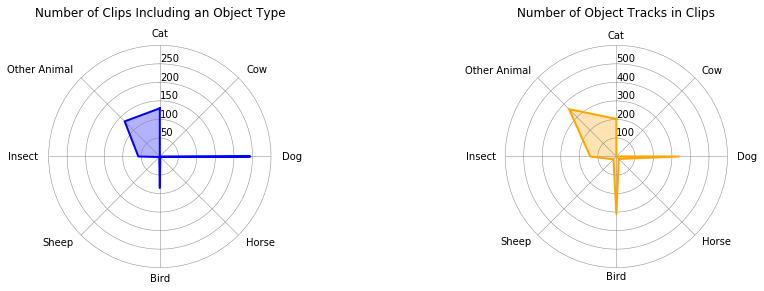

In [18]:
# Radar chart of animals by clip count
%matplotlib inline
from math import pi
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 9))

# Set data
cat_cli = ['Cat','Cow','Dog','Horse', 'Bird','Sheep','Insect','Other Animal']
values = [cat_clip,cow_clip,dog_clip,horse_clip,bird_clip,sheep_clip,insect_clip,other_animal_clip]

N = len(cat_cli)

x_as = [n / float(N) * 2 * pi for n in range(N)]

# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
values += values[:1]
x_as += x_as[:1]


# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")


# Create polar plot
ax1 = plt.subplot(2,2,1, polar=True)


# Set clockwise rotation. That is:
ax1.set_theta_offset(pi / 2)
ax1.set_theta_direction(-1)


# Set position of y-labels
ax1.set_rlabel_position(0)


# Set color and linestyle of grid
ax1.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax1.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)


# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], [])

# Set yticks
plt.yticks([50, 100, 150, 200, 250], ["50", "100", "150", "200", "250"])


# Plot data
ax1.plot(x_as, values, linewidth=2, linestyle='solid', zorder=3, color='blue')

# Fill area
ax1.fill(x_as, values, 'blue', alpha=0.3)


# Set axes limits
plt.ylim(0, 300)


# Draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 230
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 230
    elif angle_rad == pi:
        ha, distance_ax = "center", 230
    else:
        ha, distance_ax = "right", 230

    ax1.text(angle_rad, 100 + distance_ax, cat_cli[i], size=10, horizontalalignment=ha, verticalalignment="center")

ax1.set_title('Number of Clips Including an Object Type', y=1.1)

# Set data
cat_object = ['Cat','Cow','Dog','Horse', 'Bird','Sheep','Insect','Other Animal']
values = [cat_obj,cow_obj,dog_obj,horse_obj,bird_obj,sheep_obj,insect_obj,other_animal_obj]

N = len(cat_object)

x_as = [n / float(N) * 2 * pi for n in range(N)]

# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
values += values[:1]
x_as += x_as[:1]


# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")


# Create polar plot
ax2 = plt.subplot(2,2,2, polar=True)


# Set clockwise rotation. That is:
ax2.set_theta_offset(pi / 2)
ax2.set_theta_direction(-1)


# Set position of y-labels
ax2.set_rlabel_position(0)


# Set color and linestyle of grid
ax2.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax2.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)


# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], [])

# Set yticks
plt.yticks([100, 200, 300, 400, 500], ["100", "200", "300", "400", "500"])


# Plot data
ax2.plot(x_as, values, linewidth=2, linestyle='solid', zorder=3, color='orange')

# Fill area
ax2.fill(x_as, values, 'orange', alpha=0.3)


# Set axes limits
plt.ylim(0, 600)


# Draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 550
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 550
    elif angle_rad == pi:
        ha, distance_ax = "center", 550
    else:
        ha, distance_ax = "right", 550

    ax2.text(angle_rad, 100 + distance_ax, cat_object[i], size=10, horizontalalignment=ha, verticalalignment="center")

ax2.set_title('Number of Object Tracks in Clips', y=1.1)
    
plt.show()

In [19]:
# total clips with animals
total_clips_w_an= cat_clip+dog_clip+cow_clip+horse_clip+sheep_clip+bird_clip+insect_clip+other_animal_clip

# new clips with animals this week
an_clip_difference= (cat_clip+dog_clip+cow_clip+horse_clip+sheep_clip+bird_clip+insect_clip+other_animal_clip)-(prev_cat_clip+prev_dog_clip+prev_cow_clip+prev_horse_clip+prev_sheep_clip+prev_bird_clip+prev_insect_clip+prev_other_animal_clip)

# total cat tracks across all annotated clips
total_cat_tracks= cat_obj

# new cat tracks this week
cat_obj_difference=cat_obj-prev_cat_obj

# total dog tracks across all annotated clips
total_dog_tracks= dog_obj

# new dog tracks this week
dog_obj_difference=dog_obj-prev_dog_obj

# total insect tracks across all annotated clips
total_insect_tracks= insect_obj

# new insect tracks this week
insect_obj_difference=insect_obj-prev_insect_obj

# percent of tracks with vehicles
percent_clips_w_an=(float(total_clips_w_an)/total_clips_annotated)*100

tot_an= ("Number of annotated clips with animals: %d (+%d since last week)" % (total_clips_w_an,an_clip_difference))
#tot_cat= ("Number of cats annotated in clips: %d (+%d since last week)" % (total_cat_tracks,cat_obj_difference))
#tot_dog= ("Number of dogs annotated in clips: %d (+%d since last week)" % (total_dog_tracks,dog_obj_difference))
an_perc= ("Percentage of clips with animals in it: %d%%" % (percent_clips_w_an))

display(Markdown(tot_an))
#display(Markdown(tot_cat))
#display(Markdown(tot_dog))
display(Markdown(an_perc))

Number of annotated clips with animals: 655 (+0 since last week)

Percentage of clips with animals in it: 10%

## Package Statistics

In [20]:
init_notebook_mode(connected=True)   


# Add original data
x=ts['timestamp'].tolist()

y0_org=ts['video_counts.package'].tolist()
y1_org=ts['individual_counts.package'].tolist()


# Add data to create cumulative stacked values
y0_stck=y0_org
y1_stck=y1_org

# Create proper percentages for proportion of graph
y0_perc_gra=y0_stck
y1_perc_gra=y1_stck


# Make original values strings and add % for hover text
y0_txt=[str(y0) for y0 in y0_perc_gra]
y1_txt=[str(y1) for y1 in y1_perc_gra]


per_clip = go.Scatter(
    x=x,
    y=y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(109, 163, 249)'),
    fill='tonexty',
    name='Videos With Packages'
)

per_track = go.Scatter(
    x=x,
    y=y1_stck,
    text=y1_txt,
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=2,
              color='rgb(242, 204, 109)'),
    fill='tonexty',
    name='Package Tracks in Videos'
)

data = [per_clip, per_track]


layout = go.Layout(
    autosize=False,
    width=750,
    height=350,
    title='Videos With Packages and Package Tracks in Videos Over Time',
    xaxis=dict(
        title='Date'),
    yaxis=dict(
        title='Count'),
    )
fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [21]:
# total clips with packages
total_clips_w_package= package_clip

# new clips with packages this week
package_clip_difference=package_clip-prev_package_clip

# total packages tracks across all annotated clips
total_package_tracks=package_obj

# new packages tracks this week
package_obj_difference=package_obj-prev_package_obj

# percent of tracks with packages
percent_clips_w_package=(float(package_clip)/total_clips_annotated)*100

tot_pac= ("Number of annotated clips with packages: %d (+%d since last week)" % (total_clips_w_package,package_clip_difference))
tot_ind_pac= ("Number of individual packages annotated in clips: %d (+%d since last week)" % (total_package_tracks,package_obj_difference))
pac_perc= ("Percentage of clips with packages in it: %d%%" % (percent_clips_w_package))

display(Markdown(tot_pac))
display(Markdown(tot_ind_pac))
display(Markdown(pac_perc))

Number of annotated clips with packages: 115 (+0 since last week)

Number of individual packages annotated in clips: 229 (+0 since last week)

Percentage of clips with packages in it: 1%

### Sound Stats

In [22]:
####Part 3: Plots (plotly, seaborn, etc.)#########

# Ideas for plots
# - Growth rate of videos annotated - timeseries plot with percent increase
# - Growth rate by object type - timeseries plot with percent increase
# - Radar plot of object type proportions ---done
# - Radar plot of object type proportions in annotated vids versus beta cameras?
# - Proportion of objects in gt to objects shown in jon's health stats - should be similar or show unusual proportion of 
# things in donated vids
#

In [23]:
ts.head()

,camera_count,donated_video_count,free_video_count,individual_counts.airplane,individual_counts.bicycle,individual_counts.bird,individual_counts.boat,individual_counts.bus,individual_counts.car,individual_counts.cat,...,video_counts.face,video_counts.horse,video_counts.insect,video_counts.motorbike,video_counts.other_animal,video_counts.package,video_counts.person,video_counts.sheep,video_counts.train,video_counts.truck
2,1163,14465,692,0,50,304,12,22,3867,201,...,1435,6,121,30,234,111,1808,4,0,94
1,1639,14465,1464,0,74,306,12,24,4475,200,...,2256,2,51,36,133,114,2650,2,0,98
0,1639,14465,1856,0,87,310,12,24,6302,203,...,2381,2,58,36,134,115,2817,2,0,120
3,1639,18058,2189,0,87,310,12,24,6302,203,...,2381,2,58,36,134,115,2817,2,0,120
